In [1]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import numpy as np
import math

In [3]:
df = pd.read_csv('TradeData_5_28_2023_18_15_27.csv', )
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 25330: invalid start byte

In [2]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [75]:
df = pd.read_csv('trade_1988_2021.csv')

for year in df['Year'].unique():
    dfyear = df.loc[df['Year'] == year]
    dfyear[['ReporterISO3', 'PartnerISO3']].to_csv(f'RedesAnos/{year}.txt', sep=' ', index=False, header=False)

In [4]:
G = nx.read_edgelist('RedesAnos/2020.txt')

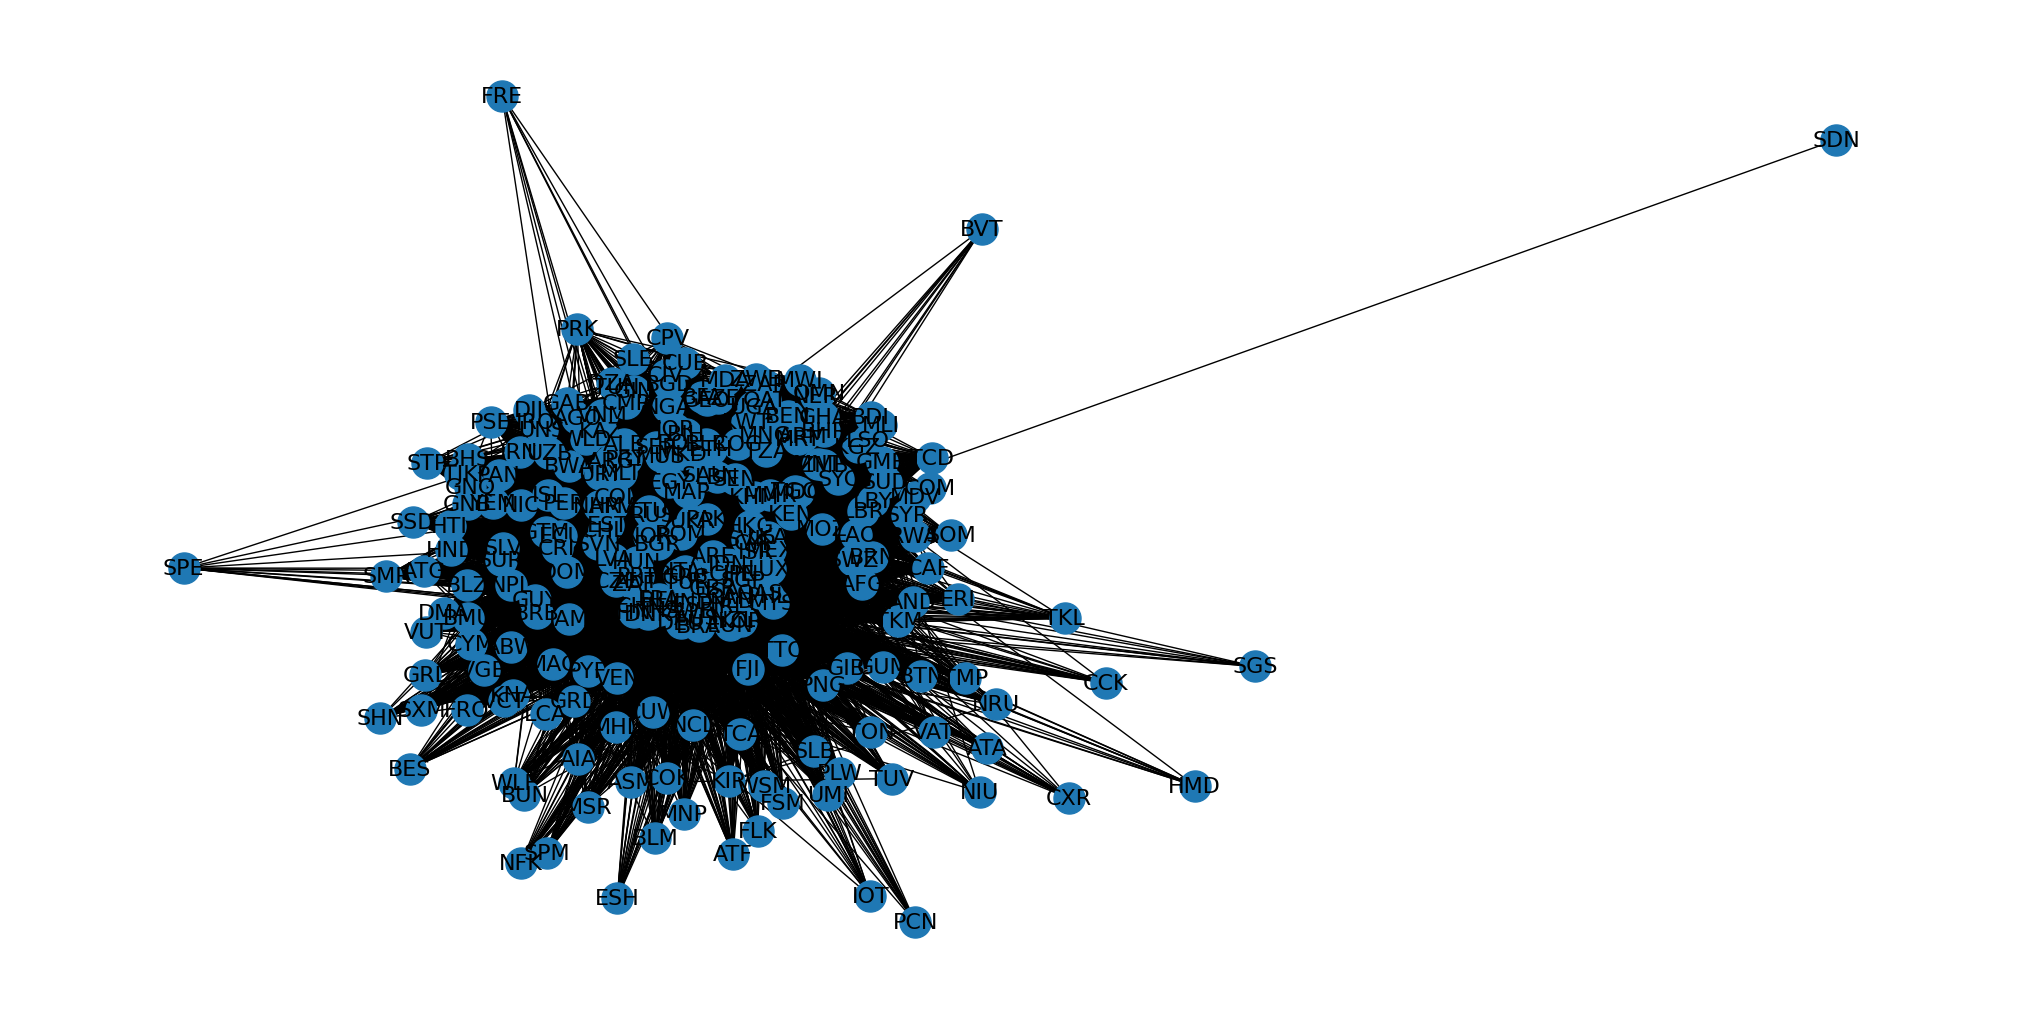

In [12]:
import matplotlib.pyplot as plt
pos=nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(20, 10))
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Gerar redes para diversos anos e calcular medidas: average shortest path length,
entropia do grau, média do eigenvector centrality, modularidade etc.

In [100]:
result = pd.DataFrame(columns = ['Grau Medio', 'Entropia', 'Menor caminho medio', 'Eigenvector centrality', 'Assortatividade', 'Modularidade', 'Closeness centrality', 'Diametro', 'Eficiencia Global'])
medidas = []
for year in np.sort(df['Year'].unique()):
    G = nx.read_edgelist(f'RedesAnos/{year}.txt')
    
    avg_dg = momment(G, 1)
    entropy = shannon_entropy(G)
    short_path = nx.average_shortest_path_length(G)
    eign_mean = np.mean(list(dict(nx.eigenvector_centrality(G)).values()))
    assortativity = nx.degree_assortativity_coefficient(G)

    lc = nx.community.louvain_communities(G)
    mod = nx.community.modularity(G, lc)
    
    close = np.mean(list(dict(nx.closeness_centrality(G)).values()))
    diameter = nx.diameter(G)
    ef = nx.global_efficiency(G)
    
    meds = [avg_dg, entropy, short_path, eign_mean, assortativity, mod, close, diameter, ef]
    
    result.loc[year] = meds
    # medidas.append([year, meds])

In [101]:
result

,Grau Medio,Entropia,Menor caminho medio,Eigenvector centrality,Assortatividade,Modularidade,Closeness centrality,Diametro,Eficiencia Global
1988,43.404878,4.900872,1.790100,0.059263,-0.756825,0.053142,0.575174,3.0,0.605906
1989,57.736585,5.815025,1.721569,0.060570,-0.668560,0.066949,0.600084,3.0,0.640746
1990,65.776699,6.210847,1.682501,0.060957,-0.591147,0.073110,0.613568,3.0,0.659871
1991,69.261084,6.358201,1.659123,0.061991,-0.560707,0.081539,0.622429,3.0,0.671105
1992,76.302222,6.655600,1.665317,0.058298,-0.534591,0.082922,0.619162,3.0,0.669325
1993,82.237885,6.737360,1.637129,0.058772,-0.516416,0.082910,0.630224,3.0,0.681773
1994,86.995595,6.815874,1.616155,0.059273,-0.479040,0.084852,0.638449,3.0,0.692286
1995,92.713656,6.818587,1.590425,0.059685,-0.447307,0.085317,0.648795,3.0,0.705008
1996,97.076233,6.824649,1.563326,0.060562,-0.423411,0.084662,0.660291,3.0,0.718539
1997,101.390135,7.014249,1.545025,0.060883,-0.399552,0.082405,0.668246,3.0,0.728067
